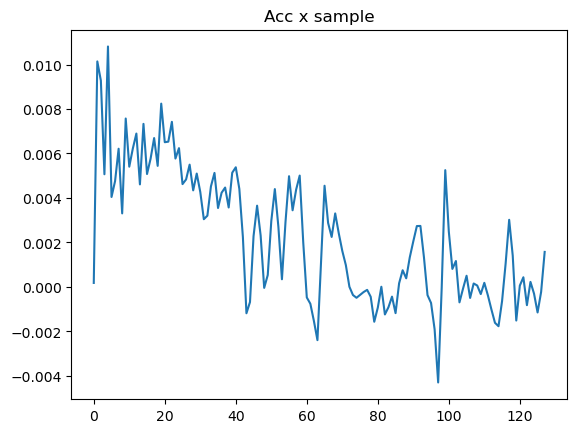

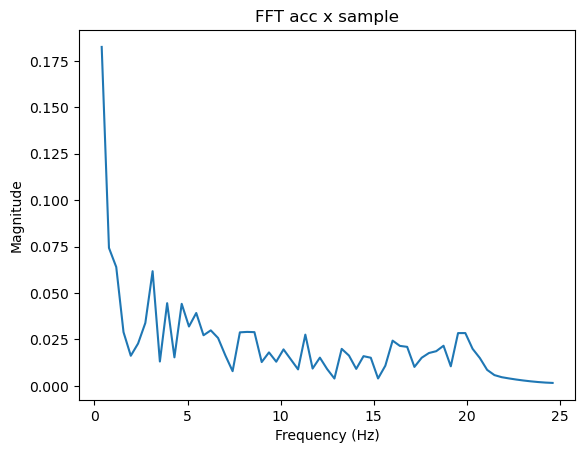

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load the accelerometer x data from the UCI HAR dataset
X_train = np.loadtxt('HAR_data/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt')

window_size = 128
sampling_rate = 50 # Hz

window_data = X_train[0][0:window_size]# Take the first window of first sample
plt.plot(window_data)
plt.title('Acc x sample')
plt.figure()

fft_data = np.fft.fft(window_data) #fft
freq_axis = np.fft.fftfreq(window_size, d=1/sampling_rate) #frequency axis
range = (freq_axis > 0)

# Plot the Fourier transform
plt.plot(freq_axis[range], np.abs(fft_data)[range])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT acc x sample')
plt.show()


In [ ]:
import numpy as np
from scipy import stats

# Function to extract features from a window of data
def extract_features(window):

    # Time-domain features
    mean = np.mean(window, axis=0)
    std = np.std(window, axis=0)
    mad = stats.median_absolute_deviation(window, axis=0)
    skew = stats.skew(window, axis=0)
    kurtosis = stats.kurtosis(window, axis=0)

    # Frequency-domain features (using FFT)
    fft_data = np.fft.fft(window, axis=0)
    freqs = np.fft.fftfreq(window.shape[0], d=1.0/50.0)  # Sampling frequency = 50 Hz
    idx = np.argsort(freqs)
    freqs = freqs[idx]
    fft_data = fft_data[idx]
    freq_magnitudes = np.abs(fft_data)
    max_freq_magnitude = np.max(freq_magnitudes, axis=0)
    max_freq_idx = np.argmax(freq_magnitudes, axis=0)
    freq_skew = stats.skew(freq_magnitudes, axis=0)
    freq_kurtosis = stats.kurtosis(freq_magnitudes, axis=0)

    # Concatenate all features into a single feature vector
    features = np.concatenate((mean, std, mad, skew, kurtosis, max_freq_magnitude, max_freq_idx, freq_skew, freq_kurtosis))

    return features